Import Libraies

In [1]:
#importing all libraries
import matplotlib.pyplot as plt  # Matplotlib is a plotting library used for creating visualizations such as graphs, charts, and histograms.
import re  # The 're' module provides support for regular expressions, which are powerful tools for pattern matching and text manipulation.
import os  # The 'os' module provides a way to interact with the operating system, allowing tasks such as file and directory manipulation.
import pandas as pd  # Pandas is a data manipulation library used for working with structured data, such as dataframes.
import zipfile  # The 'zipfile' module provides tools for creating, reading, and extracting ZIP archives.
import numpy as np  # NumPy is a library for numerical computing in Python, providing support for arrays, matrices, and mathematical functions.
import pandas as pd  # Another import statement for 'pandas', which is redundant as 'pd' has already been imported above.
import seaborn as sns  # Seaborn is a statistical data visualization library based on Matplotlib, offering enhanced aesthetics and additional plotting capabilities.
import keras  # Keras is a high-level neural networks API, providing an interface for building and training deep learning models.
# import tensorflow as tf  # TensorFlow is an open-source machine learning framework developed by Google, widely used for building and training machine learning models.


In [2]:
# import fnmatch
import nltk # Natural Language Toolkit (NLTK) is a library for working with human language data.
 
 

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem.wordnet import WordNetLemmatizer # WordNetLemmatizer is used for lemmatization, reducing words to their base or root form
wordnet_lemmatizer = WordNetLemmatizer() # Initializing WordNetLemmatizer for use

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#Keras Tokenizer just replaces certain punctuation characters and splits on the remaining space character.
#NLTK Tokenizer uses the Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank. 
# Importing specific modules from NLTK
from nltk.stem import WordNetLemmatizer  # WordNetLemmatizer is used for lemmatization, reducing words to their base or root form
from nltk.corpus import stopwords  # NLTK's corpus module provides a collection of stopwords for different languages
from nltk.tokenize import word_tokenize  # Word tokenization splits text into individual words or tokens
from nltk.stem import PorterStemmer  # PorterStemmer is used for stemming, reducing words to their root form by removing affixes

# Importing utilities from Keras
import keras.utils  # Keras is a high-level neural networks API, providing utilities for building and training deep learning models
from keras import utils as np_utils  # Utilities for handling arrays and categorical data in Keras



Create Lable List that Contain catagerios for classfication

In [5]:
labels=['none','mild','moderate','moderately severe', 'severe']
num_classes = len(labels)

create Function for Extracting Conversational Data from Transcript Files

In [6]:
def transcripts_to_dataframe(directory):
    rows_list = []
    
    # List of session IDs to skip
    skip_ids = {'342', '373', '394', '398', '402', '416', '417', '444', '451', '458', '460', '480'}
    
    # Iterate over session zip files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.zip'):
            # Extract session ID from the filename
            match = re.match(r'(\d+)_P\.zip', filename)
            if not match:
                continue
            session_id = match.group(1)
            
            # Skip the session IDs in the skip list
            if session_id in skip_ids:
                print(f"Skipping session {session_id}")
                continue
            
            # Path to the zip file
            zip_file_path = os.path.join(directory, filename)
            
            # Read the zip file
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                for file_info in zip_ref.infolist():
                    if file_info.filename.endswith('_TRANSCRIPT.csv'):
                        # Read the transcript CSV file
                        try:
                            with zip_ref.open(file_info) as transcript_file:
                                transcript_df = pd.read_csv(transcript_file, sep='\t', encoding='utf-8')
                                # Iterate over rows in the transcript DataFrame
                                for index, row in transcript_df.iterrows():
                                    # Check if the speaker is Ellie
                                    if row['speaker'] == 'Ellie':
                                        question = row['value']
                                        # Check if the next row exists and is not Ellie's
                                        if index + 1 < len(transcript_df) and transcript_df.iloc[index + 1]['speaker'] != 'Ellie':
                                            answer = transcript_df.iloc[index + 1]['value']
                                            rows_list.append({'personId': session_id, 'question': question, 'answer': answer})
                        except UnicodeDecodeError:
                            print(f"Skipping file {file_info.filename} in session {session_id} due to encoding error")
    
    # Create DataFrame from rows list
    all_sessions_df = pd.DataFrame(rows_list)
    
    # Save DataFrame to CSV
    csv_path = os.path.join(directory, 'all.csv')
    all_sessions_df.to_csv(csv_path, index=False)
    print(f"File '{csv_path}' was created")
    
    return all_sessions_df

# Example usage
directory = "E:/Daic Woz Dataset"
all_participants = transcripts_to_dataframe(directory)


Skipping session 373
Skipping session 402
Skipping session 416
Skipping session 417
Skipping session 444
Skipping session 451
Skipping session 458
Skipping session 480
Skipping file ._487_TRANSCRIPT.csv in session 487 due to encoding error
File 'E:/Daic Woz Dataset\all.csv' was created


Load the Data set

In [7]:
#loading the data
data_path = "E:/Daic Woz Dataset"
all_participants = transcripts_to_dataframe(data_path)
 

Skipping session 373
Skipping session 402
Skipping session 416
Skipping session 417
Skipping session 444
Skipping session 451
Skipping session 458
Skipping session 480
Skipping file ._487_TRANSCRIPT.csv in session 487 due to encoding error
File 'E:/Daic Woz Dataset\all.csv' was created


Display Participant Data

In [8]:
all_participants.head(20)

,personId,question,answer
0,300,how are you doing today,good
1,300,where are you from originally,atlanta georgia
2,300,why'd you move to l_a,um my parents are from here um
3,300,how do you like l_a,i love it
4,300,what are some things you really like about l_a,i like the weather
5,300,how easy was it for you to get used to living ...,um
6,300,what are some things you don't really like abo...,congestion
7,300,mhm,that's it
8,300,what'd you study at school,um i took up business and administration
9,300,are you still doing that,uh yeah i am


Clean Data

In [9]:
def text_to_wordlist(text, remove_stopwords=True, stem_words=False):    
    # Check if the input text is a string
    if isinstance(text, str):
        # Clean the text, with the option to remove stopwords and to stem words.
        # Convert words to lower case and split them
        text = text.lower().split()

        # Optionally, remove stop words
        if remove_stopwords:
            stops = stopwords.words("english")
            text = [wordnet_lemmatizer.lemmatize(w) for w in text if not w in stops ]
            text = [w for w in text if w != "nan" ]
        else:
            text = [wordnet_lemmatizer.lemmatize(w) for w in text]
            text = [w for w in text if w != "nan" ]
        
        text = " ".join(text)

        # Clean the text
        text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
        text = re.sub(r"what's", "what is ", text)
        text = re.sub(r"\'s", " ", text)
        text = re.sub(r"\'ve", " have ", text)
        text = re.sub(r"can't", "cannot ", text)
        text = re.sub(r"n't", " not ", text)
        text = re.sub(r"i'm", "i am ", text)
        text = re.sub(r"\'re", " are ", text)
        text = re.sub(r"\'d", " would ", text)
        text = re.sub(r"\'ll", " will ", text)
        text = re.sub(r",", " ", text)
        text = re.sub(r"\.", " ", text)
        text = re.sub(r"!", " ! ", text)
        text = re.sub(r"\/", " ", text)
        text = re.sub(r"\^", " ^ ", text)
        text = re.sub(r"\+", " + ", text)
        text = re.sub(r"\-", " - ", text)
        text = re.sub(r"\=", " = ", text)
        
        text = re.sub(r"\<", " ", text)
        text = re.sub(r"\>", " ", text)
        
        text = re.sub(r"'", " ", text)
        text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
        text = re.sub(r":", " : ", text)
        text = re.sub(r" e g ", " eg ", text)
        text = re.sub(r" b g ", " bg ", text)
        text = re.sub(r" u s ", " american ", text)
        text = re.sub(r"\0s", "0", text)
        text = re.sub(r" 9 11 ", "911", text)
        text = re.sub(r"e - mail", "email", text)
        text = re.sub(r"j k", "jk", text)
        text = re.sub(r"\s{2,}", " ", text)
        
        # Optionally, shorten words to their stems
        if stem_words:
            text = text.split()
            stemmer = SnowballStemmer('english')
            stemmed_words = [stemmer.stem(word) for word in text]
            text = " ".join(stemmed_words)
        
        # Return a list of words
        return text
    else:
        # If the input text is not a string, return an empty string
        return ""


creating a corpus with the words from the answers without stopwords given by the patients

In [10]:
  #creating a corpus with the words from the answers without stopwords given by the patients
all_participants_mix = all_participants.copy() # However, if you need the original list unchanged when the new list is modified, you can use copy() method. This is called shallow copy.
all_participants_mix['answer'] = all_participants_mix.apply(lambda row: text_to_wordlist(row.answer).split(), axis=1)

In [11]:
##creating a corpus with the words from the answers withstopwords given by the patients
# stopwords are ={what is , have,}
all_participants_mix_stopwords = all_participants.copy()
all_participants_mix_stopwords['answer'] = all_participants_mix_stopwords.apply(lambda row: text_to_wordlist(row.answer, remove_stopwords=False).split(), axis=1)


Extracting and Flattening Words from Answers to Determine Vocabulary Size

In [12]:
import itertools
words = [w for w in all_participants_mix['answer'].tolist()]
words = set(itertools.chain(*words)) #chain('ABC', 'DEF') --> A B C D E F
vocab_size = len(words)

In [13]:
#display words
words

{'program',
 'mature',
 'small',
 'excellent',
 'loyalty',
 'prolly',
 'briggs',
 'daughter',
 'encouragement',
 'roommate',
 'introduced',
 'support',
 'breath',
 'inherently',
 'fourteen',
 'shit',
 'fine',
 'meant',
 'criticizing',
 'rest',
 'curr',
 'entertai',
 'sunday',
 'location',
 'wise',
 'isolated',
 'forgot',
 'instilled',
 'professional',
 'bullied',
 'hardest',
 'lie',
 'buy',
 'drunk',
 'housewife',
 'rapid',
 'grade',
 'inspirational',
 'smoking',
 'become',
 'english',
 'animated',
 'picky',
 'hitting',
 'maturity',
 'unless',
 'university',
 'master',
 'explore',
 'boston',
 'mechanic',
 'valid',
 'kidnapped',
 'nobody',
 'even',
 'hired',
 'turn',
 'continual',
 'improved',
 'portland',
 'happier',
 'puzzle',
 'start',
 'settle',
 'stick',
 'super',
 'gotcha',
 'managing',
 'asleep',
 'developer',
 'blessed',
 'intelligent',
 'may',
 'along',
 'to',
 'parole',
 'proximity',
 'creatively',
 'tomorrow',
 'restaurant',
 'loyal',
 'greatest',
 'stayed',
 'sport',
 'exper

In [14]:
words_stop = [w for w in all_participants_mix_stopwords['answer'].tolist()]
words_stop = set(itertools.chain(*words_stop))
vocab_size_stop = len(words_stop)

In [15]:
words_stop

{'program',
 'where',
 'mature',
 'small',
 'excellent',
 'loyalty',
 'prolly',
 'briggs',
 'daughter',
 'encouragement',
 'roommate',
 'introduced',
 'support',
 'breath',
 'inherently',
 'fourteen',
 'shit',
 'fine',
 'meant',
 'criticizing',
 'rest',
 'curr',
 'entertai',
 'sunday',
 'location',
 'wise',
 'isolated',
 'forgot',
 'instilled',
 'professional',
 'bullied',
 'hardest',
 'lie',
 'buy',
 'drunk',
 'housewife',
 'rapid',
 'grade',
 'inspirational',
 'smoking',
 'become',
 'english',
 'animated',
 'picky',
 'hitting',
 'maturity',
 'unless',
 'university',
 'master',
 'explore',
 'boston',
 'mechanic',
 'valid',
 'into',
 'kidnapped',
 'nobody',
 'even',
 'hired',
 'turn',
 'continual',
 'improved',
 'portland',
 'happier',
 'puzzle',
 'start',
 'settle',
 'stick',
 'super',
 'gotcha',
 'managing',
 'asleep',
 'too',
 'developer',
 'blessed',
 'intelligent',
 'may',
 'along',
 'to',
 'parole',
 'proximity',
 'creatively',
 'tomorrow',
 'restaurant',
 'loyal',
 'greatest',
 

DATA VISULIZATION

In [16]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


WORD CLOUD

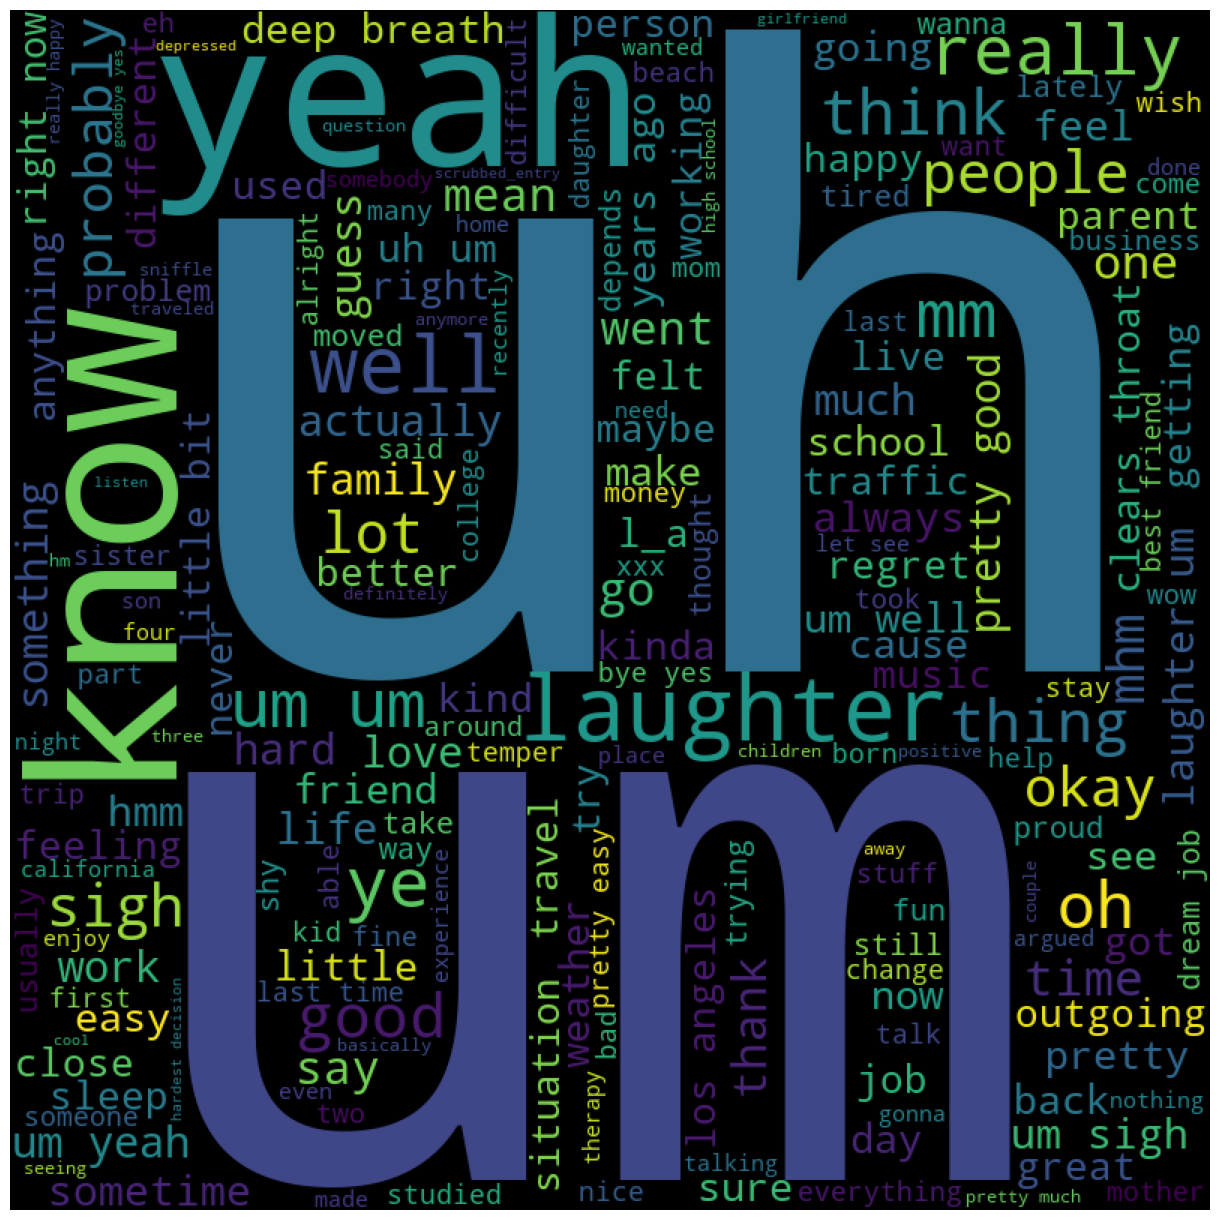

In [17]:
#wordcloud used to represent the important words based on frequency

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv mifile 
for val in all_participants['answer'].values: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Unigram of the top 20 frequent words

In [18]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


um 2580
uh 1925
yeah 700
like 687
just 680
laughter 680
know 582
don 487
good 420
yes 415
really 412
sigh 403
mm 363
ve 347
oh 317
pretty 304
think 274
people 269
okay 221
lot 208
things 205
probably 194
time 192
years 179
mhm 175
hmm 172
ago 163
little 162
went 139
easy 138
say 136
right 133
hard 133
mean 132
doing 128
different 127
thank 126
feel 120
new 120
family 117


<Axes: title={'center': 'Top 20 words in review after removing stop words'}, xlabel='Text'>

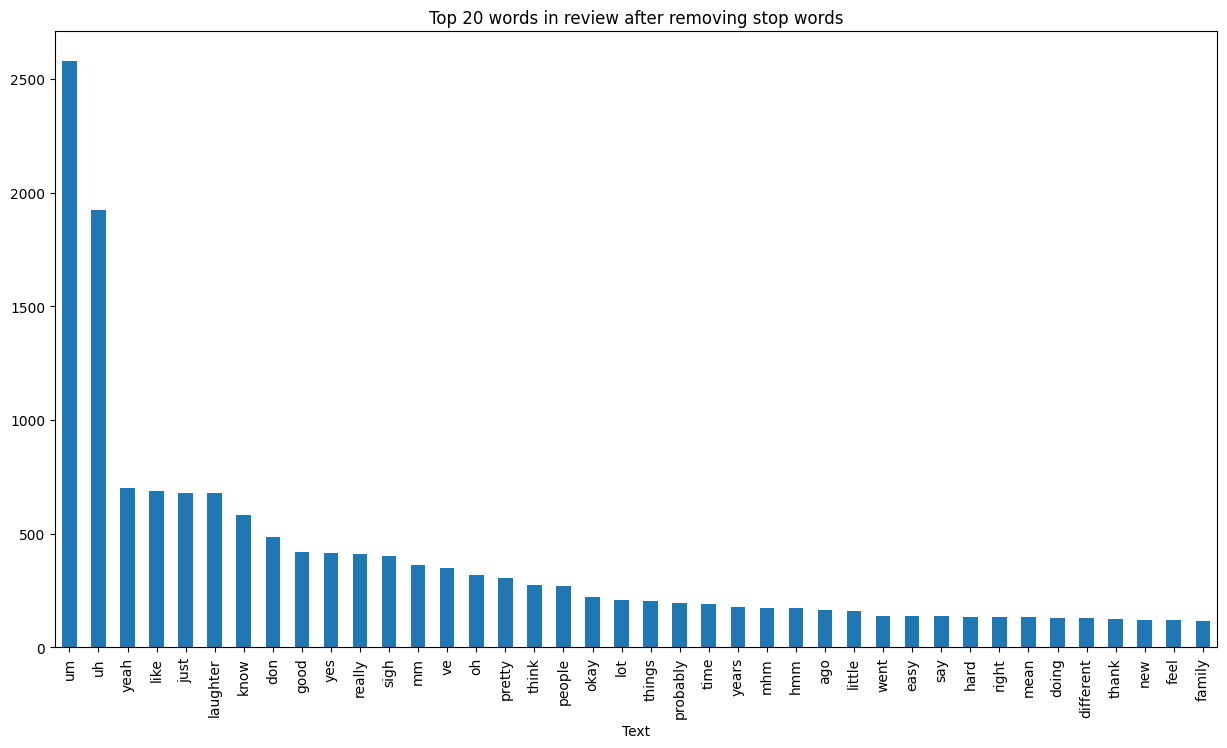

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
#The distribution of top unigrams

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(all_participants['answer'].dropna(), 40)

for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words',figsize=(15,8))

### Bigram of the top 20 frequent words

don know 129
pretty good 119
deep breath 89
um sigh 86
years ago 85
little bit 69
clears throat 67
uh just 64
los angeles 59
um just 58
dream job 52
don really 43
uh sigh 43
pretty easy 40
best friend 40
um like 34
don like 33
just uh 33
uh like 32
uh don 32
really happy 31
high school 29
know just 29
just like 29
um pretty 29
uh ve 28
um don 28
hardest decision 28
um think 27
uh really 27
uh uh 26
um yeah 25
don think 25
laughter um 25
um uh 25
feel like 24
months ago 24
ve feeling 24
um ve 24
um probably 23


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='Text'>

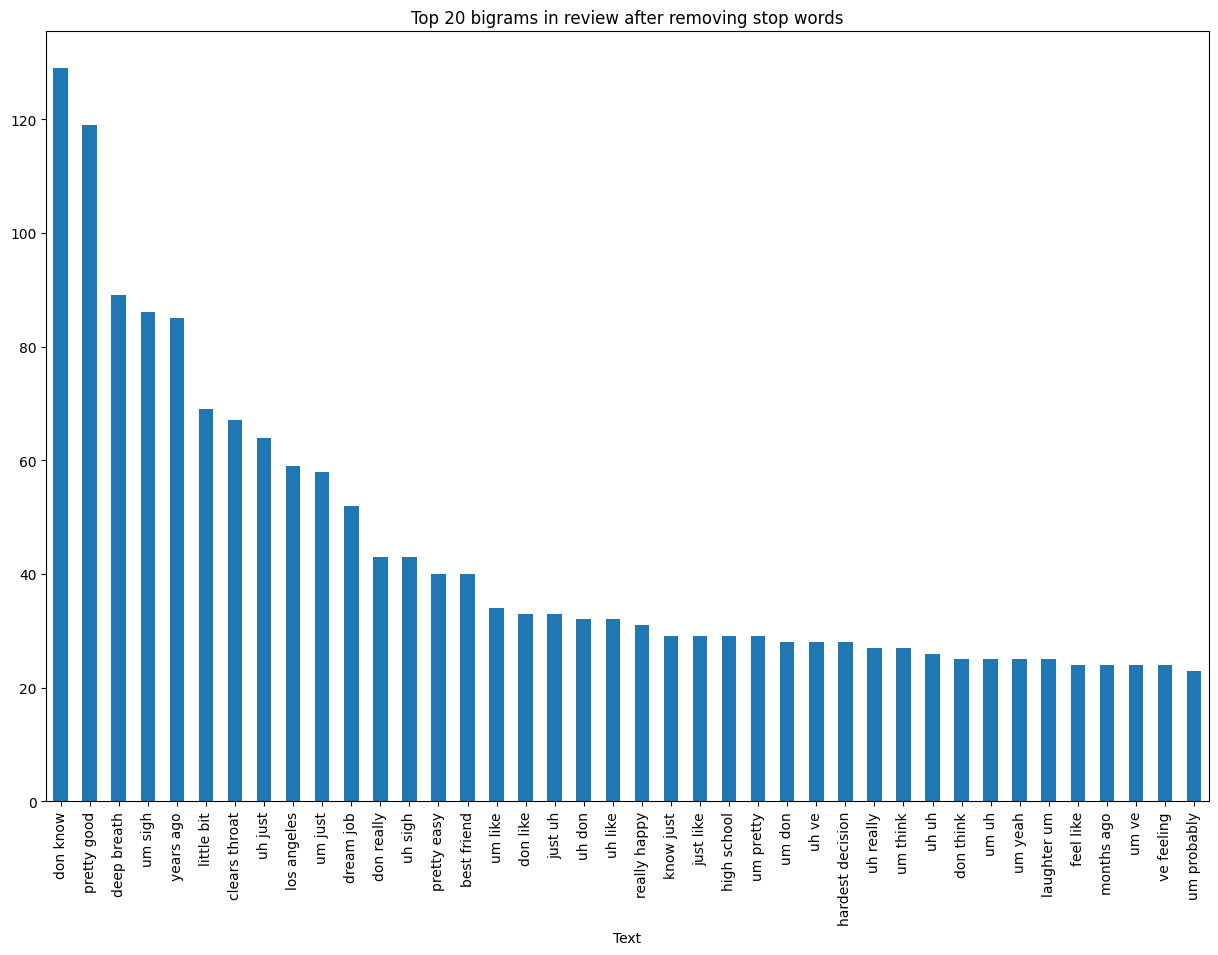

In [20]:
# The distribution of top bigrams

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(all_participants['answer'].dropna(), 40)

for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df4.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words',figsize = (15,10))

### Trigram of the top 20  frequent words

deep breath sigh 17
los angeles california 16
meeting new people 16
felt really happy 13
don know just 12
time felt really 12
um clears throat 11
good controlling temper 11
deep breath um 11
um don know 10
uh don know 10
uh years ago 9
um pretty good 9
pretty good don 9
think pretty good 9
hardest decision ve 9
decision ve make 9
good night sleep 8
seeing new things 8
seeing new places 8
doing pretty good 8
don best friend 7
feeling pretty good 7
uh pretty good 7
uh los angeles 7
couple days ago 6
new people seeing 6
pretty good controlling 6
time argued somebody 6
good don really 6
thirty years ago 6
seeing different places 6
deep breath hmm 6
um pretty close 5
uh little bit 5
laughter don know 5
ve feeling pretty 5
um years ago 5
don know maybe 5
um pretty easy 5


<Axes: title={'center': 'Top 20 trigrams in review after removing stop words'}, xlabel='Text'>

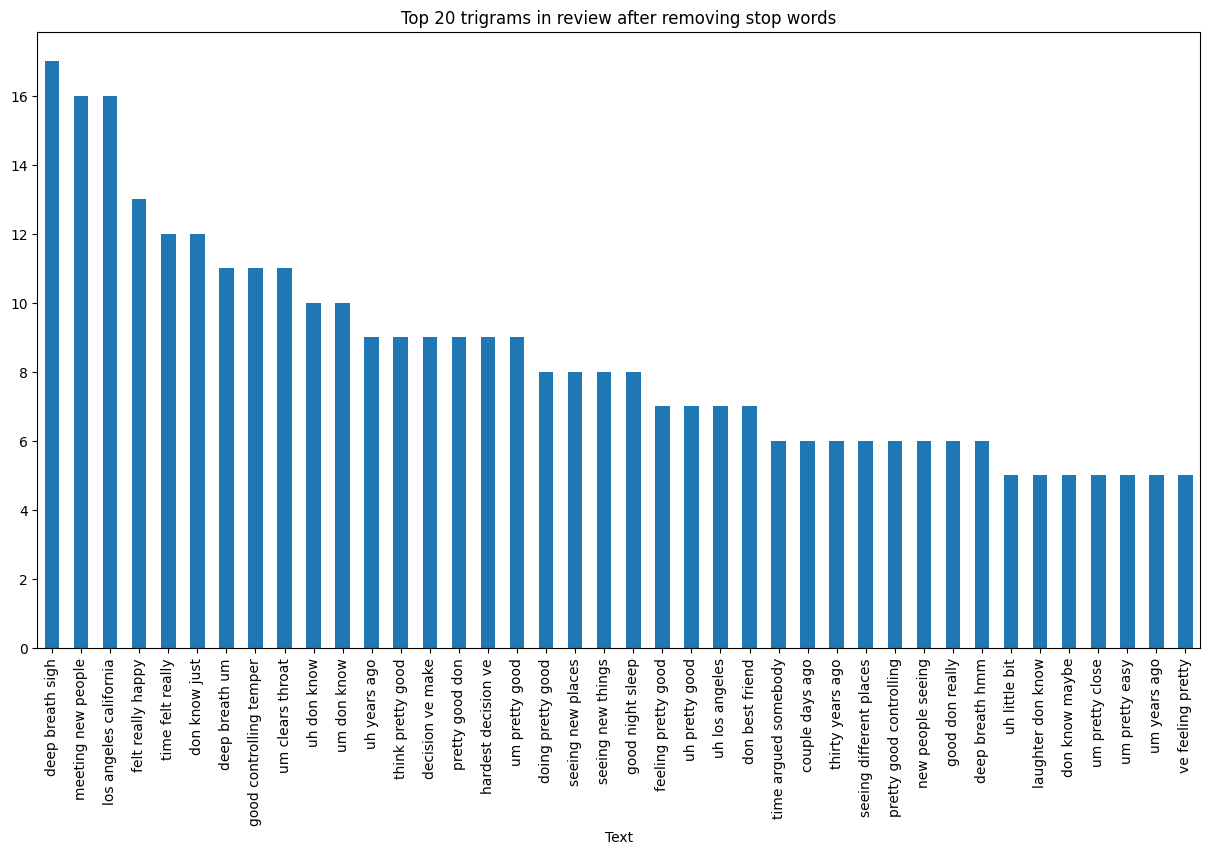

In [21]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(all_participants['answer'].dropna(), 40)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df6.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review after removing stop words',figsize=(15,8))

Label data

In [22]:
def load_avec_dataset_file(path,score_column):
    ds = pd.read_csv(path, sep=',')
    ds['level'] = pd.cut(ds[score_column], bins=[-1,0,5,10,15,25], labels=[0,1,2,3,4])  #cut function used to segregate array into bins 5 levels - 'none','mild','moderate','moderately severe', 'severe'
    ds['PHQ8_Score'] = ds[score_column]
    ds['cat_level'] = keras.utils.to_categorical(ds['level'], num_classes).tolist() #categorical levels 
    ds = ds[['Participant_ID', 'level', 'cat_level', 'PHQ8_Score','Gender']] 
    ds = ds.astype({"Participant_ID": int, "level": int, 'PHQ8_Score': int})
    return ds

In [23]:
# import tensorflow as tf
# from tensorflow import keras
import distutils as _distutils

train = load_avec_dataset_file('E:/Daic Woz Dataset/train_test/train_split_Depression_AVEC2017.csv','PHQ8_Score')
dev = load_avec_dataset_file('E:/Daic Woz Dataset/train_test/dev_split_Depression_AVEC2017.csv','PHQ8_Score')
test = load_avec_dataset_file('E:/Daic Woz Dataset/train_test/full_test_split.csv','PHQ_Score')
print("Size: train= {}, dev= {}, test={}".format(len(train), len(dev), len(test)))
train.head()

Size: train= 107, dev= 35, test=47


,Participant_ID,level,cat_level,PHQ8_Score,Gender
0,303,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0,0
1,304,2,"[0.0, 0.0, 1.0, 0.0, 0.0]",6,0
2,305,2,"[0.0, 0.0, 1.0, 0.0, 0.0]",7,1
3,310,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",4,1
4,312,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",2,1


### Participants with PHQ SCORES

In [24]:
ds_total = pd.concat([dev,train,test])
total_phq8 = len(ds_total)
print("Total size = {}".format(total_phq8))

Total size = 189


In [25]:
ds_total

,Participant_ID,level,cat_level,PHQ8_Score,Gender
0,302,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",4,1
1,307,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",4,0
2,331,2,"[0.0, 0.0, 1.0, 0.0, 0.0]",8,1
3,335,3,"[0.0, 0.0, 0.0, 1.0, 0.0]",12,0
4,346,4,"[0.0, 0.0, 0.0, 0.0, 1.0]",23,0
...,...,...,...,...,...
42,467,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0,1
43,469,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",3,0
44,470,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",3,0
45,480,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",1,1


In [26]:
ds_total.to_csv('E:/Daic Woz Dataset/ds_total.csv', sep=',')
print("File was created")


File was created


Descriptive Statistics and Missing Values

In [27]:
ds_total.describe()

,Participant_ID,level,PHQ8_Score,Gender
count,189.000000,189.000000,189.000000,189.000000
mean,395.947090,1.714286,6.746032,0.539683
std,56.117822,1.199671,5.924081,0.499747
min,300.000000,0.000000,0.000000,0.000000
25%,348.000000,1.000000,2.000000,0.000000
50%,396.000000,1.000000,5.000000,1.000000
75%,444.000000,2.000000,10.000000,1.000000
max,492.000000,4.000000,23.000000,1.000000


In [28]:
ds_total.isnull().sum()

Participant_ID    0
level             0
cat_level         0
PHQ8_Score        0
Gender            0
dtype: int64

In [29]:
# Basic statistics for PHQ-8 scores
phq8_stats = ds_total['PHQ8_Score'].describe()
print("\nPHQ-8 Scores Statistics:")
print(phq8_stats)


PHQ-8 Scores Statistics:
count    189.000000
mean       6.746032
std        5.924081
min        0.000000
25%        2.000000
50%        5.000000
75%       10.000000
max       23.000000
Name: PHQ8_Score, dtype: float64


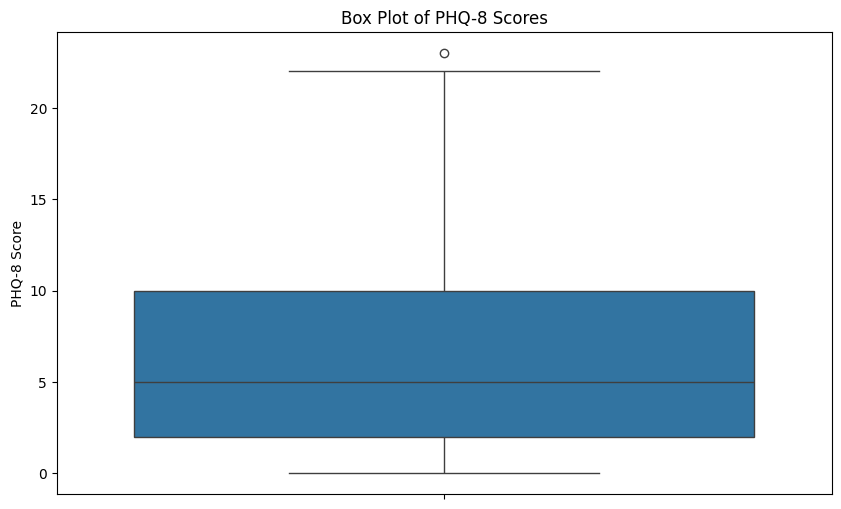

In [30]:
# Plot a box plot for PHQ-8 scores
plt.figure(figsize=(10, 6))
sns.boxplot(y=ds_total['PHQ8_Score'])
plt.title('Box Plot of PHQ-8 Scores')
plt.ylabel('PHQ-8 Score')
plt.show()


### Number of Participants with differnt PHQ Scores

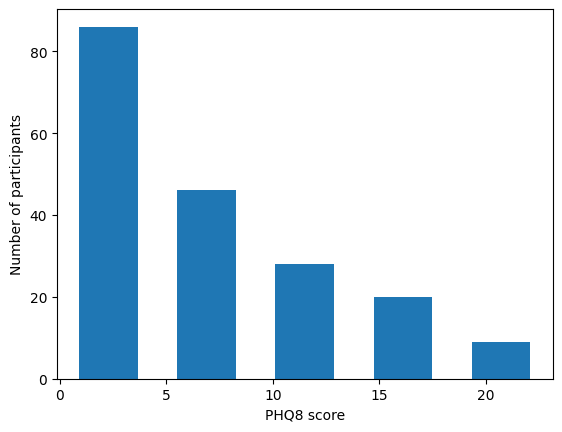

In [31]:
bins=[-1,0,5,10,15,25]
plt.figure()
plt.hist(ds_total["PHQ8_Score"], rwidth=0.6, bins=5)
plt.xlabel('PHQ8 score')
plt.ylabel('Number of participants')
plt.show()
 

### Gender distribution for differnt levels of depression


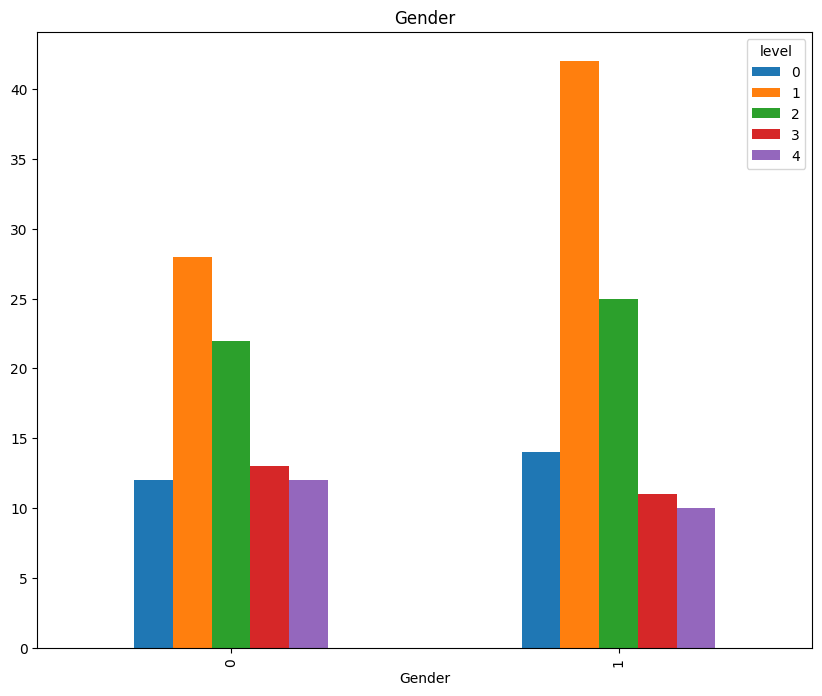

In [32]:
pd.crosstab(ds_total.Gender, ds_total.level).plot(kind="bar", figsize=(10, 8), title="Gender");
plt.plot();

In [33]:

all_participants_mix_stopwords  = all_participants_mix_stopwords.rename(columns={"personId": "Participant_ID"})


In [34]:
all_participants_mix_stopwords

,Participant_ID,question,answer
0,300,how are you doing today,[good]
1,300,where are you from originally,"[atlanta, georgia]"
2,300,why'd you move to l_a,"[um, my, parent, are, from, here, um]"
3,300,how do you like l_a,"[i, love, it]"
4,300,what are some things you really like about l_a,"[i, like, the, weather]"
...,...,...,...
10334,492,regret (is there anything you regret),[no]
10335,492,advice_back (what advice would you give to you...,"[mm, that, a, good, question]"
10336,492,mhm (mhm),"[and, to, go, forward]"
10337,492,Ellie17Dec2012_08 (what are you most proud of ...,[um]


In [35]:
ds_total

,Participant_ID,level,cat_level,PHQ8_Score,Gender
0,302,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",4,1
1,307,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",4,0
2,331,2,"[0.0, 0.0, 1.0, 0.0, 0.0]",8,1
3,335,3,"[0.0, 0.0, 0.0, 1.0, 0.0]",12,0
4,346,4,"[0.0, 0.0, 0.0, 0.0, 1.0]",23,0
...,...,...,...,...,...
42,467,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0,1
43,469,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",3,0
44,470,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",3,0
45,480,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",1,1


In [36]:

all_participants_mix_stopwords['Participant_ID'] = all_participants_mix_stopwords['Participant_ID'].astype(int)

# Merge the two DataFrames based on the 'Participant_ID' column
merged_df = pd.merge(all_participants_mix_stopwords, ds_total, on='Participant_ID', how='inner')
print(merged_df.head())

 

   Participant_ID                                        question  \
0             300                         how are you doing today   
1             300                   where are you from originally   
2             300                           why'd you move to l_a   
3             300                             how do you like l_a   
4             300  what are some things you really like about l_a   

                                  answer  level                  cat_level  \
0                                 [good]      1  [0.0, 1.0, 0.0, 0.0, 0.0]   
1                     [atlanta, georgia]      1  [0.0, 1.0, 0.0, 0.0, 0.0]   
2  [um, my, parent, are, from, here, um]      1  [0.0, 1.0, 0.0, 0.0, 0.0]   
3                          [i, love, it]      1  [0.0, 1.0, 0.0, 0.0, 0.0]   
4                [i, like, the, weather]      1  [0.0, 1.0, 0.0, 0.0, 0.0]   

   PHQ8_Score  Gender  
0           2       1  
1           2       1  
2           2       1  
3           2       

In [37]:

%pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
%pip show keras

Name: keras
Version: 3.3.3
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, rich
Required-by: tensorflow-intel
Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model

In [40]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing import sequence


In [41]:

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [42]:
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences  # Add this import statement



In [43]:
# Define max_words and max_len
max_words = 10000
max_len = 100

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(merged_df['answer'])
X = tokenizer.texts_to_sequences(merged_df['answer'])
X = pad_sequences(X, maxlen=max_len)

# Encode labels
y = pd.get_dummies(merged_df['level']).values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8271, 100)
y_train shape: (8271, 5)
X_test shape: (2068, 100)
y_test shape: (2068, 5)


In [44]:
# Define and compile the model
from keras.models import Sequential
from keras.layers import Embedding, LSTM, SpatialDropout1D, Dense

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model without early stopping
history = model.fit(X_train, y_train, epochs=180, batch_size=64, validation_data=(X_test, y_test))

 
model.summary()


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/180
130/130 ━━━━━━━━━━━━━━━━━━━━ 31s 185ms/step - accuracy: 0.3516 - loss: 1.5358 - val_accuracy: 0.3598 - val_loss: 1.5180
Epoch 2/180
130/130 ━━━━━━━━━━━━━━━━━━━━ 26s 203ms/step - accuracy: 0.3559 - loss: 1.5134 - val_accuracy: 0.3598 - val_loss: 1.5141
Epoch 3/180
130/130 ━━━━━━━━━━━━━━━━━━━━ 27s 210ms/step - accuracy: 0.3617 - loss: 1.4815 - val_accuracy: 0.3574 - val_loss: 1.5162
Epoch 4/180
130/130 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - accuracy: 0.4115 - loss: 1.4003 - val_accuracy: 0.3491 - val_loss: 1.5407
Epoch 5/180
130/130 ━━━━━━━━━━━━━━━━━━━━ 35s 150ms/step - accuracy: 0.4543 - loss: 1.3297 - val_accuracy: 0.3274 - val_loss: 1.5930
Epoch 6/180
130/130 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.4872 - loss: 1.2578 - val_accuracy: 0.3288 - val_loss: 1.6360
Epoch 7/180
130/130 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - accuracy: 0.4889 - loss: 1.2203 - val_accuracy: 0.3250 - val_loss: 1.6774
Epoch 8/180
130/130 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.5238 -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 100, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,242,717 (12.37 MB)

 Trainable params: 1,080,905 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,161,812 (8.25 MB)

In [45]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3132 - loss: 4.4004
Test Accuracy: 0.30319148302078247


In [46]:
Y_pred=model.predict(X_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


In [47]:
Y_pred

array([[1.67538568e-01, 6.04065716e-01, 1.31419986e-01, 9.47703421e-02,
        2.20536883e-03],
       [2.98084444e-07, 9.99997497e-01, 1.09748328e-06, 2.34648354e-08,
        1.05650884e-06],
       [9.69583094e-02, 3.59135509e-01, 2.87125766e-01, 1.32641420e-01,
        1.24139056e-01],
       ...,
       [1.18704760e-04, 9.99665856e-01, 2.05339034e-04, 9.69050575e-07,
        9.14740122e-06],
       [9.69582945e-02, 3.59135509e-01, 2.87125826e-01, 1.32641405e-01,
        1.24139041e-01],
       [9.99923348e-01, 3.38091450e-05, 3.49064726e-06, 3.85086969e-05,
        8.72884868e-07]], dtype=float32)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


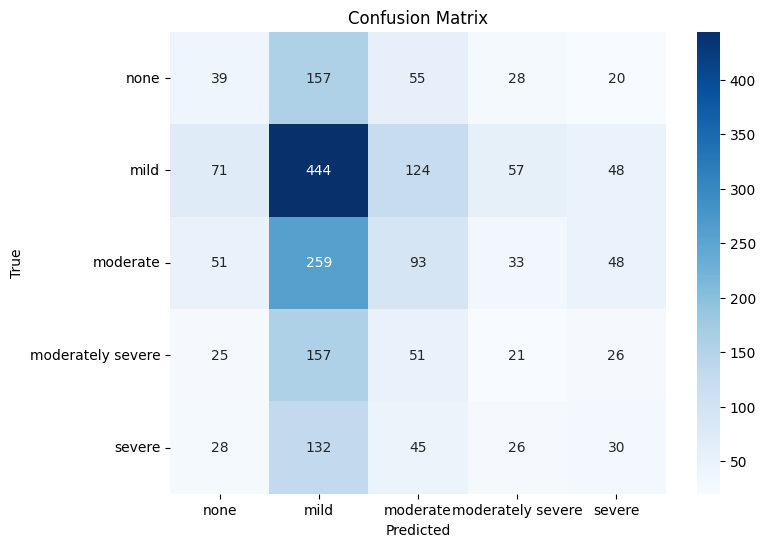

In [48]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test data
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
 
# Visualize the confusion matrix
 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
